Zahja096( zahra jalilpour)_ lab1_deep learning

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


# Part 3: Hardware

Skip questions 1, 2, 3, 5, 6 if you use your own computer.

In deep learning, the computer hardware is very important. You should always know what kind of hardware you are working on.

Question 1: What graphics card is available in the cloud machine? Run 'nvidia-smi' in the terminal. 

Question 2: Google the name of the graphics card, how many CUDA cores does it have?

Question 3: How much memory does the graphics card have?

Question 4: What is stored in the GPU memory while training a DNN ?
#### Answer4: 
While training a DNN, input data, weight parameters and activations are stored in GPU memory. 


Question 5: What CPU is available in the cloud machine? How many cores does it have? Run 'lscpu' in the terminal.

Question 6: How much CPU memory (RAM) is available in the cloud machine? Run 'free -g' in the terminal.

In [3]:
import os
import warnings

# Ignore FutureWarning from numpy
warnings.simplefilter(action='ignore', category=FutureWarning)

import keras.backend as K
import tensorflow as tf

os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID";
 
# The GPU id to use, usually either "0" or "1";
os.environ["CUDA_VISIBLE_DEVICES"]="0";

# Allow growth of GPU memory, otherwise it will always look like all the memory is being used
physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [3]:
from numpy import genfromtxt
import numpy as np


# Part 4: Load the data

Load the dataset from the csv files, it will take some time since it is almost 1.4 GB. 

We will use the function `genfromtxt` to load the data.

https://docs.scipy.org/doc/numpy/reference/generated/numpy.genfromtxt.html

Load the data from csv files the first time, then save the data as numpy files for faster loading the next time.



In [4]:
X1 = genfromtxt("/content/drive/My Drive/Mirai_dataset.csv", delimiter=",")

Y1 = genfromtxt("/content/drive/My Drive/Mirai_labels.csv", delimiter=",")

In [5]:
X=X1
Y=Y1
# Save data as numpy arrays, for faster loading in future calls to this cell
np.save('Mirai_data.npy', X)
np.save('Mirai_labels.npy', Y)

In [6]:
# Load data from numpy arrays, for faster loading
X = np.load('Mirai_data.npy')
Y = np.load('Mirai_labels.npy')

# Remove the first 24 covariates
X = np.delete(X, obj=np.s_[:24], axis=1)
# X= X[:,24:116]

print('The covariates have size {}.'.format(X.shape))
print('The labels have size {}.'.format(Y.shape))

# Print the number of examples of each class
print('Class 0 has {} examples'.format(sum([1 for i in Y if i==0])))
print('Class 1 has {} examples'.format(sum([1 for i in Y if i==1])))

The covariates have size (764137, 92).
The labels have size (764137,).
Class 0 has 121621 examples
Class 1 has 642516 examples


# Part 5: How good is a naive classifier?

Question 7: Given the distribution of examples, how high classification performance can a naive classifier obtain? The naive classifier will assume that all examples belong to one class. Note: you do not need to make a naive classifier, this is a theoretical question, just to understand how good performance we can obtain by random chance.

Answer 7: In the Naive classifier we assume all examples belong to one class(class0 or class 1). We can define a probabilistic model to evaluate Naive classifier.We can define model prediction as P(yhat=y) and it can be obtained by this formul:P(yhat = y) =P(yhat=0)*P(y=0) + P(yhat=1)*P(y=1)
As it is mensioned all examples belong to one class, we calculate the accuracy in each class. For class 0(if this class is assumed) the accuracy is 15.92 and for class 1(if this class is assumed) the accuracy is 84.08

In [7]:
#https://machinelearningmastery.com/how-to-develop-and-evaluate-naive-classifier-strategies-using-probability/
print('Class 0 :%.2f'%((sum([1 for i in Y if i==0]))/len(Y) * 100))
print('Class 1 :%.2f'%((sum([1 for i in Y if i==1]))/len(Y) * 100))


Class 0 :15.92
Class 1 :84.08


In [8]:
# It is common to have NaNs in the data, lets check for it. Hint: np.isnan()
print(np.isnan(X))
print(np.isnan(Y))

# Print the number of NaNs (not a number) in the labels
print('Labels have {} NaNs'.format(np.sum(np.isnan(Y))))

# Print the number of NaNs in the covariates
print('Covariates have {} NaNs'.format(np.sum(np.isnan(X))))

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
[False False False ... False False False]
Labels have 0 NaNs
Covariates have 0 NaNs


# Part 6: Preprocessing

Lets do some simple preprocessing


In [9]:
X = X.astype(float)

# Convert labels to ints
Y = Y.astype(int)

# Remove mean of each covariate (column)
X = X - np.mean(X, axis=0)

# Divide each covariate (column) by its standard deviation
X = X/np.std(X, axis=0)

# Check that mean is 0 and standard deviation is 1 for all covariates, by printing mean and std
print("Mean")
print(np.mean(X, axis=0))
print("Standard Deviation")
print(np.std(X, axis=0))

Mean
[-3.19451533e-18 -6.32970181e-14  1.19926356e-13  4.56743018e-15
  4.10210037e-14  1.46130975e-13  5.85246484e-16 -1.69734859e-14
 -3.36915700e-13  1.28688437e-12 -2.69360995e-12 -1.10733213e-13
 -1.22392702e-13 -1.70649630e-13 -1.02461166e-14  2.50701280e-12
  1.47553162e-12  1.08446837e-12 -1.04981959e-13  6.83458762e-14
 -1.03373555e-13  5.98825773e-14 -1.02025960e-12 -1.68983055e-12
 -1.79101143e-12 -1.31828514e-13  4.42580403e-13  6.14635580e-13
  5.78048199e-14 -4.92623328e-13 -2.54513072e-12  1.86544900e-13
 -1.53444593e-13  1.68079591e-12  9.30041709e-13  1.50738177e-13
 -1.15688852e-12 -3.62610361e-13 -1.71390937e-12 -2.09264067e-13
  1.07161976e-12 -1.45236885e-12 -1.69724579e-14 -1.64918984e-16
 -5.13444996e-14 -1.02171349e-14 -1.74685907e-15  1.34264921e-13
  5.98801969e-14  1.48745574e-17 -4.25442340e-13  5.78079594e-14
  1.25638129e-15  1.69449684e-13  1.50725881e-13  2.14439542e-14
  3.65457183e-14  1.17260451e-13 -8.82752870e-13 -6.34816648e-13
 -1.62109649e-12  2.

# Part 7: Split the dataset

Use the first 70% of the dataset for training, leave the other 30% for validation and test, call the variables

Xtrain (70%)

Xtemp  (30%)

Ytrain (70%)

Ytemp  (30%)


In [10]:
index = (int)(X.shape[0]*0.7)

Xtrain, Xtemp = X[:index,:], X[index:,:]

Ytrain, Ytemp = Y[:index], Y[index:]

print('Xtrain has size {}.'.format(Xtrain.shape))
print('Ytrain has size {}.'.format(Ytrain.shape))

print('Xtemp has size {}.'.format(Xtemp.shape))
print('Ytemp has size {}.'.format(Ytemp.shape))

# Print the number of examples of each class, for the training data and the remaining 30%
print('The number of examples per Class 0 in Ytrain is {}'.format(sum([1 for i in Ytrain if i==0])))
print('The number of examples per Class 1 in Ytrain is {}'.format(sum([1 for i in Ytrain if i==1])))
print('The number of examples per Class 0 in Ytemp is {}'.format(sum([1 for i in Ytemp if i==0])))
print('The number of examples per Class 1 in Ytemp is {}'.format(sum([1 for i in Ytemp if i==1])))

Xtrain has size (534895, 92).
Ytrain has size (534895,).
Xtemp has size (229242, 92).
Ytemp has size (229242,).
The number of examples per Class 0 in Ytrain is 121621
The number of examples per Class 1 in Ytrain is 413274
The number of examples per Class 0 in Ytemp is 0
The number of examples per Class 1 in Ytemp is 229242


Part 8: Number of examples per class

Question 8: Can we use the dataset as it is? Why not?







In [ ]:
''' We can not use this data set, because the rows of data set are not shuffled. If we do not split randomly, the train and test splits may 
end up being biased. 
As we can see in class 0, the number of example in remaining data is 0 and it shows that the data is not distributed in a good way.'''

Lets randomly shuffle the data, to get some examples of each class in training data and in the remaining 30%. Use the function `shuffle` in scikit learn

https://scikit-learn.org/stable/modules/generated/sklearn.utils.shuffle.html

In [11]:
from sklearn.utils import shuffle

# Randomly shuffle data, to get both classes in training and testing
X, Y = shuffle(X, Y)

# Divide the data into training and validation/test again

split = (int)(X.shape[0]*0.7)

Xtrain, Xtemp = X[:split,:], X[split:,:]

Ytrain, Ytemp = Y[:split], Y[split:]


# Print the number of examples of each class, for the training data and the remaining 30%
print('The number of examples per Class 0 in Ytrain is {}'.format(sum([1 for i in Ytrain if i==0])))
print('The number of examples per Class 1 in Ytrain is {}'.format(sum([1 for i in Ytrain if i==1])))
print('The number of examples per Class 0 in Ytemp is {}'.format(sum([1 for i in Ytemp if i==0])))
print('The number of examples per Class 1 in Ytemp is {}'.format(sum([1 for i in Ytemp if i==1])))


The number of examples per Class 0 in Ytrain is 85223
The number of examples per Class 1 in Ytrain is 449672
The number of examples per Class 0 in Ytemp is 36398
The number of examples per Class 1 in Ytemp is 192844


#  Part 9: Split non-training data data into validation and test
Split your non-training data (Xtemp, Ytemp) into 50% validation (Xval, Yval) and 50% testing (Xtest, Ytest), we use a function from scikit learn. 

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [12]:
from sklearn.model_selection import train_test_split

Xtest, Xval, Ytest, Yval = train_test_split(Xtemp, Ytemp, test_size=0.5)

print('The validation and test data have size {}, {}, {} and {}'.format(Xval.shape, Xtest.shape, Yval.shape, Ytest.shape))

The validation and test data have size (114621, 92), (114621, 92), (114621,) and (114621,)


**Part 10: DNN classification**

Finish this code to create a first version of the classifier using a DNN. Start with a simple network with 2 *dense* layers (with 20 nodes each), using sigmoid activation functions. The final dense layer should have a single node and a sigmoid activation function. We start with the SGD optimizer.

Relevant functions are

model.add(), adds a layer to the network

Dense(), a dense network layer

model.compile(), compile the model, add " metrics=['accuracy'] " to print the classification accuracy during the training

model.fit(), train the model with some training data

model.evaluate(), apply the trained model to some test data

See https://keras.io/layers/core/ for information on how the Dense() function works

Import a relevant cost / loss function for binary classification from keras.losses (https://keras.io/losses/)

See https://keras.io/models/model/ for how to compile, train and evaluate the model

In [100]:
from keras.models import Sequential, Model
from keras.layers import Input, Dense, BatchNormalization, Dropout
from keras.optimizers import SGD, Adam
from keras.losses import binary_crossentropy as BC

# Set seed from random number generator, for better comparisons
from numpy.random import seed
seed(123)
def build_DNN(input_shape, n_layers, n_nodes, act_fun='sigmoid', optimizer='sgd', learning_rate=0.01, 
              use_bn=False, use_dropout=False, use_custom_dropout=False):
    
    # Setup optimizer, depending on input parameter string
    if optimizer=='sgd':
        optim = SGD(learning_rate=learning_rate)
    if optimizer=='adam':
        optim = Adam(learning_rate=learning_rate)
    
    # Setup a sequential model
    model = Sequential()

    # Add layers to the model, using the input parameters of the build_DNN function
    
    # Add first layer, requires input shape
    model.add(Dense(n_nodes, activation=act_fun, input_shape=input_shape))
    if use_bn:
        model.add(BatchNormalization())
    if use_dropout:
            model.add(Dropout(rate=0.5))
    if use_custom_dropout:
            model.add(Dropout(rate=0.5))
    
    # Add remaining layers, do not require input shape
    for i in range(n_layers-1):
        model.add(Dense(n_nodes, activation=act_fun))
        if use_bn:
            model.add(BatchNormalization())
        if use_dropout:
            model.add(Dropout(rate=0.5))
        if use_custom_dropout:
            model.add(myDropout(rate=0.5))
    # Final layer
    model.add(Dense(1, activation='sigmoid'))
    if use_bn:
        model.add(BatchNormalization())
    
    # Compile model
    model.compile(loss=BC, optimizer=optim, metrics=['accuracy'])
    
    return model


In [101]:
# Lets define a help function for plotting the training results

import matplotlib.pyplot as plt
def plot_results(history):
    
    val_loss = history.history['val_loss']
    acc = history.history['accuracy']
    loss = history.history['loss']
    val_acc = history.history['val_accuracy']
    
    plt.figure(figsize=(10,4))
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(loss)
    plt.plot(val_loss)
    plt.legend(['Training','Validation'])

    plt.figure(figsize=(10,4))
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(acc)
    plt.plot(val_acc)
    plt.legend(['Training','Validation'])

    plt.show()

# Part 11: Train the DNN

Time to train the DNN, we start simple with 2 layers with 2 nodes each, learning rate 0.1.

### 2 layers, 20 nodes

In [122]:
# Setup some training parameters
batch_size = 10000
epochs = 20

input_shape = (X.shape[1],)

# Build the model
model1 = build_DNN(input_shape=input_shape, n_layers=2, n_nodes=20, learning_rate=0.1)

# Train the model, provide training data and validation data
history1 = model1.fit(Xtrain, Ytrain, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(Xval, Yval))

Epoch 1/20
54/54 [==============================] - 2s 21ms/step - loss: 0.4464 - accuracy: 0.8409 - val_loss: 0.3995 - val_accuracy: 0.8410
Epoch 2/20
54/54 [==============================] - 1s 13ms/step - loss: 0.3869 - accuracy: 0.8411 - val_loss: 0.3479 - val_accuracy: 0.8410
Epoch 3/20
54/54 [==============================] - 1s 13ms/step - loss: 0.3348 - accuracy: 0.8404 - val_loss: 0.2930 - val_accuracy: 0.8410
Epoch 4/20
54/54 [==============================] - 1s 13ms/step - loss: 0.2817 - accuracy: 0.8407 - val_loss: 0.2493 - val_accuracy: 0.8416
Epoch 5/20
54/54 [==============================] - 1s 13ms/step - loss: 0.2427 - accuracy: 0.8482 - val_loss: 0.2223 - val_accuracy: 0.8624
Epoch 6/20
54/54 [==============================] - 1s 13ms/step - loss: 0.2193 - accuracy: 0.8699 - val_loss: 0.2072 - val_accuracy: 0.8909
Epoch 7/20
54/54 [==============================] - 1s 14ms/step - loss: 0.2061 - accuracy: 0.8940 - val_loss: 0.1984 - val_accuracy: 0.9043
Epoch 8/20
54

In [123]:
# Evaluate the model on the test data
score = model1.evaluate(Xtest, Ytest)

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

3582/3582 [==============================] - 4s 1ms/step - loss: 0.1744 - accuracy: 0.9068
Test loss: 0.1744
Test accuracy: 0.9068


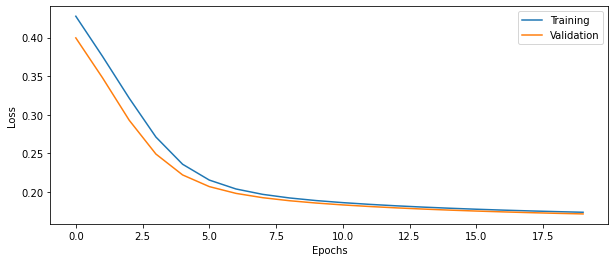

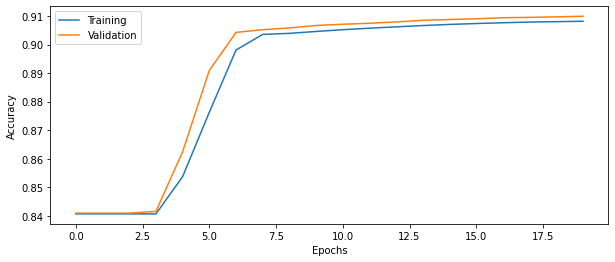

In [124]:
# Plot the history from the training run
plot_results(history1)

# Part 12: More questions

Question 9: What happens if you add several Dense layers without specifying the activation function?





Answer:
https://keras.io/api/layers/core_layers/dense/
if we do not specify activation function , no activation is applied  It should be like "linear" activation: a(x) = x

Question 10: How are the weights in each dense layer initialized as default? How are the bias weights initialized?


Answer
https://keras.io/api/layers/initializers/#glorotuniform-class

Default kernel initializer is 'glorot_uniform' and the default bias intializer is 'zeros'.

As it is mentioned in Dense leyer in 
https://keras.io/api/layers/core_layers/dense/
kernel_initializer="glorot_uniform",
bias_initializer="zeros"

# Part 13: Balancing the classes

This dataset is rather unbalanced, we need to define class weights so that the training pays more attention to the class with fewer samples. We use a function in scikit learn

https://scikit-learn.org/stable/modules/generated/sklearn.utils.class_weight.compute_class_weight.html

In [19]:
'''from sklearn.utils import class_weight

# Calculate class weights
class_weights = class_weight.compute_class_weight('balanced', np.unique(Ytrain), Ytrain)

# Print the class weights
print(class_weights)'''

[3.15066678 0.59431589]


In [18]:

from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced', np.unique(Ytrain), Ytrain)
# In google colab I had to use this method
class_weights = {l:c for l,c in zip(np.unique(Ytrain), class_weights)}
class_weights

{0: 3.138207995494174, 1: 0.5947612926755502}

### 2 layers, 20 nodes, class weights


In [125]:


# Setup some training parameters
batch_size = 10000
epochs = 20

input_shape = (X.shape[1],)
n_layers = 2
n_nodes = 20

# Build the model
model2 = build_DNN(input_shape, n_layers, n_nodes,learning_rate = 0.1)

# Train the model, provide training data and validation data
history2 = model2.fit(Xtrain,Ytrain,epochs = epochs,validation_data = (Xval,Yval),batch_size=batch_size,class_weight = class_weights)


Epoch 1/20
54/54 [==============================] - 1s 16ms/step - loss: 0.6678 - accuracy: 0.4892 - val_loss: 0.5517 - val_accuracy: 0.8812
Epoch 2/20
54/54 [==============================] - 1s 13ms/step - loss: 0.4903 - accuracy: 0.8793 - val_loss: 0.3749 - val_accuracy: 0.8808
Epoch 3/20
54/54 [==============================] - 1s 13ms/step - loss: 0.3260 - accuracy: 0.8796 - val_loss: 0.3007 - val_accuracy: 0.8814
Epoch 4/20
54/54 [==============================] - 1s 13ms/step - loss: 0.2587 - accuracy: 0.8800 - val_loss: 0.2765 - val_accuracy: 0.8820
Epoch 5/20
54/54 [==============================] - 1s 13ms/step - loss: 0.2333 - accuracy: 0.8806 - val_loss: 0.2663 - val_accuracy: 0.8846
Epoch 6/20
54/54 [==============================] - 1s 13ms/step - loss: 0.2218 - accuracy: 0.8839 - val_loss: 0.2596 - val_accuracy: 0.8880
Epoch 7/20
54/54 [==============================] - 1s 14ms/step - loss: 0.2152 - accuracy: 0.8872 - val_loss: 0.2552 - val_accuracy: 0.8923
Epoch 8/20
54

In [126]:
# Evaluate model on test data
score = model2.evaluate(Xtest, Ytest)

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

3582/3582 [==============================] - 4s 1ms/step - loss: 0.2344 - accuracy: 0.9016
Test loss: 0.2344
Test accuracy: 0.9016


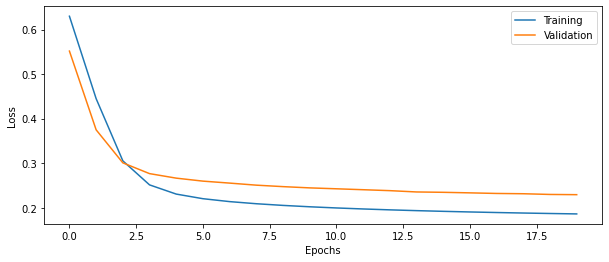

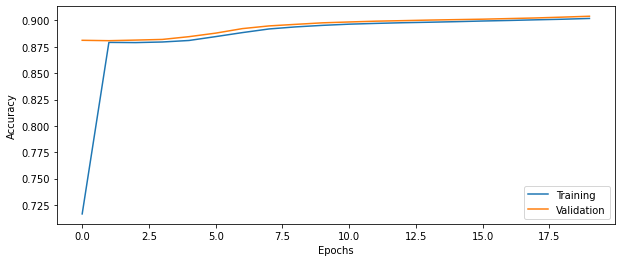

In [127]:
plot_results(history2)

# Part 14: More questions

Question 11: Why do we have to use a batch size? Why can't we simply use all data at once? This is more relevant for even larger datasets.

Answer 11 : #https://medium.com/analytics-vidhya/when-and-why-are-batches-used-in-machine-learning-acda4eb00763
When size of our data set is huge, it consumes a lot of resources and time for each iteration in model.So the training speed will be very slow because it consumes a lot of memory in CPU or GPU. So we break our data set into batches.

Question 12: How busy is the GPU for a batch size of 100? How much GPU memory is used? Hint: run 'nvidia-smi' on the cloud computer a few times during training.

Question 13: What is the processing time for one training epoch when the batch size is 100? What is the processing time for one epoch when the batch size is 1,000? What is the processing time for one epoch when the batch size is 10,000? Explain the results. 
#### Answer 13: 
When  batch_size = 100 , it takes 13s 2ms/step per epoch, when batch_size is 1000 , it takes 2s 3ms/step per epoch and when batch_size is 10000, it takes 0s 6ms/step per epoch.For batch training all of the training samples pass through the learning algorithm simultaneously in one epoch before weights are updated.When the batch_size is smaller , the number of weights to be updated is bigger. 


Question 14: How many times are the weights in the DNN updated in each training epoch if the batch size is 100? How many times are the weights in the DNN updated in each training epoch if the batch size is 1,000? How many times are the weights in the DNN updated in each training epoch if the batch size is 10,000? 
#### Answer 14:
Here we have a data set with  534895 samples(rows of training data). If we choose batch size=100, this means the data set will be divided into 5348.95 batches, each with 100 samples. This means that one epoch will involve 5348.95 updates to the model. 
for batch size = 1000, one epoch will involve 534.895 updates to the model.
for batch size = 10000, one epoch will involve 53.4895 updates to the model

Question 15: What limits how large the batch size can be?
#### Answer 15:
https://stats.stackexchange.com/questions/164876/what-is-the-trade-off-between-batch-size-and-number-of-iterations-to-train-a-neu

When using large batch size, the quality of the model and the ability of generalization decrease(By tending to sharp minimizers of the training and testing functions). Also batch size could not be larger than total number of observations.


Question 16: Generally speaking, how is the learning rate related to the batch size? If the batch size is decreased, how should the learning rate be changed?
#### Answer 16:
batch size and learning rates are related to each other. if we select small batch size, we should select low learning rate.


# Part 15: Increasing the complexity

Lets try some different configurations of number of layers and number of nodes per layer.

Question 17: How many trainable parameters does the network with 4 dense layers with 50 nodes each have, compared to the initial network with 2 layers and 20 nodes per layer? Hint: use model.summary()

In [128]:
# 2 layers with 20 nodes, learning rate=0.1 is model2, which has 2301 parameters
# 4 layers with 50 nodes, this model has 12351 parameters
model2.summary()

Model: "sequential_58"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_318 (Dense)            (None, 20)                1860      
_________________________________________________________________
dense_319 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_320 (Dense)            (None, 1)                 21        
Total params: 2,301
Trainable params: 2,301
Non-trainable params: 0
_________________________________________________________________


In [129]:
# 4 layers with 50 nodes

model_17 = build_DNN(input_shape, n_layers=4, n_nodes=50,learning_rate = 0.1)
model_17.summary()


Model: "sequential_59"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_321 (Dense)            (None, 50)                4650      
_________________________________________________________________
dense_322 (Dense)            (None, 50)                2550      
_________________________________________________________________
dense_323 (Dense)            (None, 50)                2550      
_________________________________________________________________
dense_324 (Dense)            (None, 50)                2550      
_________________________________________________________________
dense_325 (Dense)            (None, 1)                 51        
Total params: 12,351
Trainable params: 12,351
Non-trainable params: 0
_________________________________________________________________


### 4 layers, 20 nodes, class weights

In [130]:
# Setup some training parameters
batch_size = 10000
epochs = 20
input_shape = (X.shape[1],)

# Build and train model
model3 = build_DNN(input_shape, n_layers=4, n_nodes=20,learning_rate = 0.1)

history3 =model3.fit(Xtrain,Ytrain,epochs = epochs,validation_data = (Xval,Yval),batch_size=batch_size,class_weight = class_weights)

Epoch 1/20
54/54 [==============================] - 2s 21ms/step - loss: 0.6978 - accuracy: 0.7401 - val_loss: 0.6916 - val_accuracy: 0.8478
Epoch 2/20
54/54 [==============================] - 1s 17ms/step - loss: 0.6921 - accuracy: 0.5832 - val_loss: 0.6867 - val_accuracy: 0.8412
Epoch 3/20
54/54 [==============================] - 1s 17ms/step - loss: 0.6909 - accuracy: 0.7857 - val_loss: 0.6920 - val_accuracy: 0.8545
Epoch 4/20
54/54 [==============================] - 1s 17ms/step - loss: 0.6913 - accuracy: 0.7296 - val_loss: 0.6863 - val_accuracy: 0.8438
Epoch 5/20
54/54 [==============================] - 1s 17ms/step - loss: 0.6908 - accuracy: 0.7845 - val_loss: 0.6916 - val_accuracy: 0.8431
Epoch 6/20
54/54 [==============================] - 1s 17ms/step - loss: 0.6890 - accuracy: 0.7907 - val_loss: 0.6875 - val_accuracy: 0.8908
Epoch 7/20
54/54 [==============================] - 1s 17ms/step - loss: 0.6883 - accuracy: 0.8494 - val_loss: 0.6876 - val_accuracy: 0.8769
Epoch 8/20
54

In [131]:
# Evaluate model on test data
score = model3.evaluate(Xtest, Ytest)

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

3582/3582 [==============================] - 4s 1ms/step - loss: 0.2864 - accuracy: 0.8784
Test loss: 0.2864
Test accuracy: 0.8784


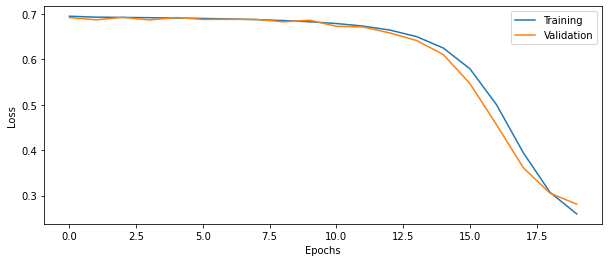

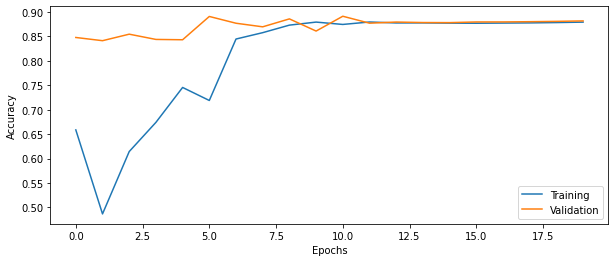

In [132]:
plot_results(history3)

### 2 layers, 50 nodes, class weights

In [27]:
# Setup some training parameters
batch_size = 10000
epochs = 20
input_shape = (X.shape[1],)


# Build and train model
model4 = build_DNN(input_shape, n_layers=2, n_nodes=50,learning_rate = 0.1)

history4 =model4.fit(Xtrain,Ytrain,epochs = epochs,validation_data = (Xval,Yval),batch_size=batch_size,class_weight = class_weights)

Epoch 1/20
54/54 [==============================] - 2s 26ms/step - loss: 0.6857 - accuracy: 0.5675 - val_loss: 0.5220 - val_accuracy: 0.8816
Epoch 2/20
54/54 [==============================] - 1s 23ms/step - loss: 0.4639 - accuracy: 0.8792 - val_loss: 0.3457 - val_accuracy: 0.8835
Epoch 3/20
54/54 [==============================] - 1s 22ms/step - loss: 0.3022 - accuracy: 0.8813 - val_loss: 0.2894 - val_accuracy: 0.8833
Epoch 4/20
54/54 [==============================] - 1s 22ms/step - loss: 0.2477 - accuracy: 0.8811 - val_loss: 0.2731 - val_accuracy: 0.8840
Epoch 5/20
54/54 [==============================] - 1s 23ms/step - loss: 0.2285 - accuracy: 0.8830 - val_loss: 0.2649 - val_accuracy: 0.8867
Epoch 6/20
54/54 [==============================] - 1s 22ms/step - loss: 0.2200 - accuracy: 0.8852 - val_loss: 0.2605 - val_accuracy: 0.8893
Epoch 7/20
54/54 [==============================] - 1s 24ms/step - loss: 0.2132 - accuracy: 0.8886 - val_loss: 0.2547 - val_accuracy: 0.8922
Epoch 8/20
54

In [28]:
# Evaluate model on test data
score =model4.evaluate(Xtest, Ytest) 

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

3582/3582 [==============================] - 4s 1ms/step - loss: 0.2347 - accuracy: 0.9008
Test loss: 0.2347
Test accuracy: 0.9008


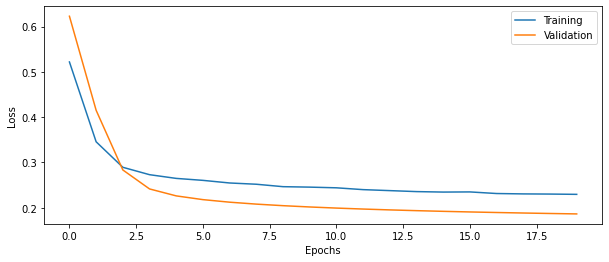

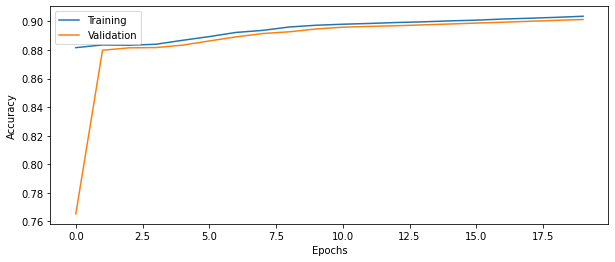

In [29]:
plot_results(history4)

### 4 layers, 50 nodes, class weights

In [134]:
# Setup some training parameters
batch_size = 10000
epochs = 20
input_shape = (X.shape[1],)

# Build and train model
model5 = build_DNN(input_shape, n_layers=4, n_nodes=50,learning_rate = 0.1)

history5 = model5.fit(Xtrain,Ytrain,epochs = epochs,validation_data = (Xval,Yval),batch_size=batch_size,class_weight = class_weights)

Epoch 1/20
54/54 [==============================] - 3s 38ms/step - loss: 0.6929 - accuracy: 0.7063 - val_loss: 0.6854 - val_accuracy: 0.8434
Epoch 2/20
54/54 [==============================] - 2s 32ms/step - loss: 0.6906 - accuracy: 0.6691 - val_loss: 0.6870 - val_accuracy: 0.8704
Epoch 3/20
54/54 [==============================] - 2s 33ms/step - loss: 0.6884 - accuracy: 0.8247 - val_loss: 0.6833 - val_accuracy: 0.8750
Epoch 4/20
54/54 [==============================] - 2s 32ms/step - loss: 0.6862 - accuracy: 0.8465 - val_loss: 0.6894 - val_accuracy: 0.8090
Epoch 5/20
54/54 [==============================] - 2s 33ms/step - loss: 0.6825 - accuracy: 0.8432 - val_loss: 0.6788 - val_accuracy: 0.8783
Epoch 6/20
54/54 [==============================] - 2s 33ms/step - loss: 0.6766 - accuracy: 0.8765 - val_loss: 0.6719 - val_accuracy: 0.8783
Epoch 7/20
54/54 [==============================] - 2s 33ms/step - loss: 0.6679 - accuracy: 0.8756 - val_loss: 0.6564 - val_accuracy: 0.8785
Epoch 8/20
54

In [135]:
# Evaluate model on test data
score =model5.evaluate(Xtest, Ytest)  

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

3582/3582 [==============================] - 4s 1ms/step - loss: 0.2524 - accuracy: 0.8891
Test loss: 0.2524
Test accuracy: 0.8891


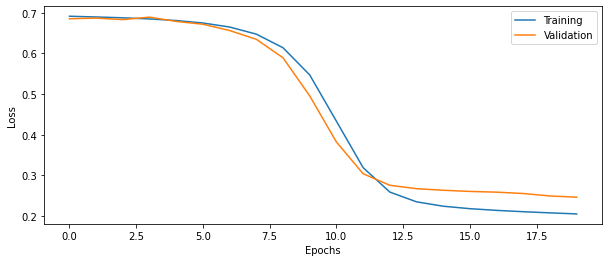

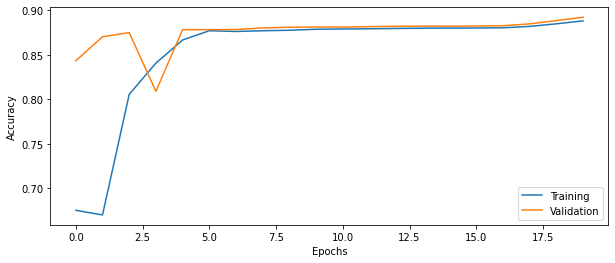

In [136]:
plot_results(history5)

# Part 16: Batch normalization

Now add batch normalization after each dense layer. Remember to import BatchNormalization from keras.layers. 

See https://keras.io/layers/normalization/ for information about how to call the function.

Question 18: Why is batch normalization important when training deep networks?
#### Answer18:
https://towardsdatascience.com/batch-normalization-8a2e585775c9
batch normalization optimize network training by network trains faster,allows us to use higher learning rates that lead to training be faster,makes weighte easier to initialize, makes more activation functions viable, simplifies the creation of deeper networks, provides a bit of regularlization and may give better results overall

### 2 layers, 20 nodes, class weights, batch normalization

In [141]:
# Setup some training parameters
batch_size = 10000
epochs = 20
input_shape = (X.shape[1],)

# Build and train model
model6 = build_DNN(input_shape=input_shape, n_layers=2, n_nodes=20, learning_rate=0.1, use_bn=True)


history6 =model6.fit(Xtrain,Ytrain,epochs = epochs,validation_data = (Xval,Yval),batch_size=batch_size,class_weight = class_weights)

Epoch 1/20
54/54 [==============================] - 3s 25ms/step - loss: 1.3302 - accuracy: 0.8348 - val_loss: 0.5816 - val_accuracy: 0.8410
Epoch 2/20
54/54 [==============================] - 1s 21ms/step - loss: 1.0955 - accuracy: 0.8791 - val_loss: 0.2005 - val_accuracy: 0.8795
Epoch 3/20
54/54 [==============================] - 1s 21ms/step - loss: 1.0990 - accuracy: 0.8791 - val_loss: 1.5762 - val_accuracy: 0.8822
Epoch 4/20
54/54 [==============================] - 1s 20ms/step - loss: 1.0976 - accuracy: 0.8803 - val_loss: 1.8207 - val_accuracy: 0.8817
Epoch 5/20
54/54 [==============================] - 1s 21ms/step - loss: 1.1017 - accuracy: 0.8798 - val_loss: 1.8233 - val_accuracy: 0.8814
Epoch 6/20
54/54 [==============================] - 1s 21ms/step - loss: 1.0972 - accuracy: 0.8804 - val_loss: 1.8214 - val_accuracy: 0.8814
Epoch 7/20
54/54 [==============================] - 1s 21ms/step - loss: 1.0998 - accuracy: 0.8801 - val_loss: 1.8196 - val_accuracy: 0.8818
Epoch 8/20
54

In [142]:
# Evaluate model on test data
score = model6.evaluate(Xtest, Ytest)  

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

3582/3582 [==============================] - 4s 1ms/step - loss: 1.6055 - accuracy: 0.8953
Test loss: 1.6055
Test accuracy: 0.8953


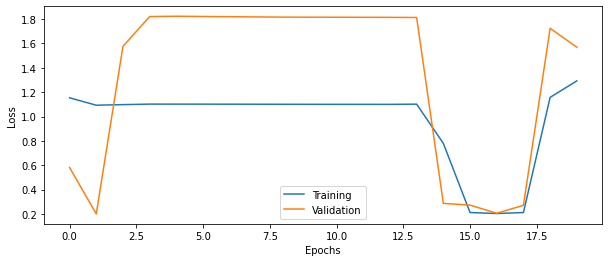

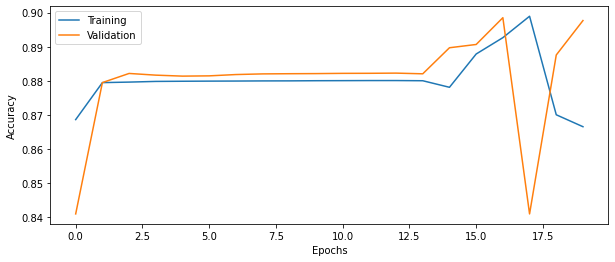

In [143]:
plot_results(history6)

# Part 16: Activation function

Try changing the activation function in each layer from sigmoid to ReLU, write down the test accuracy.

Note: the last layer should still have a sigmoid activation function.

https://keras.io/api/layers/activations/

### 2 layers, 20 nodes, class weights, ReLU, no batch normalization


In [144]:
# Setup some training parameters
batch_size = 10000
epochs = 20
input_shape = (X.shape[1],)

# Build and train model
model7 = build_DNN(input_shape=input_shape, n_layers=2, n_nodes=20, learning_rate=0.1, act_fun='relu')
history7 =model7.fit(Xtrain,Ytrain,epochs = epochs,validation_data = (Xval,Yval),batch_size=batch_size,class_weight = class_weights)

Epoch 1/20
54/54 [==============================] - 1s 17ms/step - loss: 0.4723 - accuracy: 0.7165 - val_loss: 0.2670 - val_accuracy: 0.8869
Epoch 2/20
54/54 [==============================] - 1s 14ms/step - loss: 0.2059 - accuracy: 0.8879 - val_loss: 0.2481 - val_accuracy: 0.8952
Epoch 3/20
54/54 [==============================] - 1s 13ms/step - loss: 0.1938 - accuracy: 0.8952 - val_loss: 0.2406 - val_accuracy: 0.9030
Epoch 4/20
54/54 [==============================] - 1s 14ms/step - loss: 0.1876 - accuracy: 0.9028 - val_loss: 0.2348 - val_accuracy: 0.9067
Epoch 5/20
54/54 [==============================] - 1s 13ms/step - loss: 0.1835 - accuracy: 0.9057 - val_loss: 0.2324 - val_accuracy: 0.9088
Epoch 6/20
54/54 [==============================] - 1s 13ms/step - loss: 0.1802 - accuracy: 0.9082 - val_loss: 0.2259 - val_accuracy: 0.9103
Epoch 7/20
54/54 [==============================] - 1s 13ms/step - loss: 0.1783 - accuracy: 0.9087 - val_loss: 0.2270 - val_accuracy: 0.9109
Epoch 8/20
54

In [145]:
# Evaluate model on test data
score = model7.evaluate(Xtest, Ytest)

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

3582/3582 [==============================] - 4s 1ms/step - loss: 0.2115 - accuracy: 0.9148
Test loss: 0.2115
Test accuracy: 0.9148


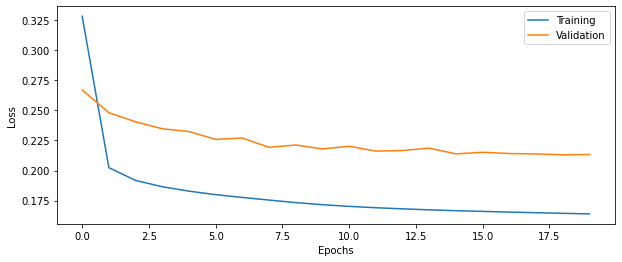

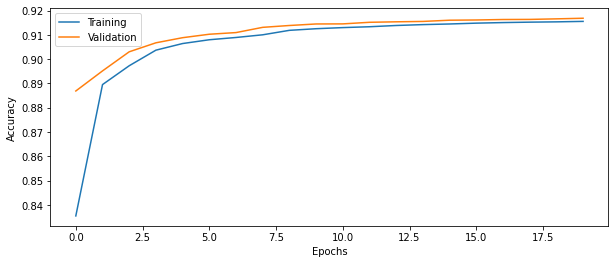

In [146]:
plot_results(history7)

# Part 17: Optimizer

Try changing the optimizer from SGD to Adam (with learning rate 0.1 as before). Remember to import the Adam optimizer from keras.optimizers. 

https://keras.io/optimizers/


### 2 layers, 20 nodes, class weights, Adam optimizer, no batch normalization, sigmoid activations

In [147]:
# Setup some training parameters
batch_size = 10000
epochs = 20
input_shape = (X.shape[1],)

# Build and train model
model8 = build_DNN(input_shape=input_shape, n_layers=2, n_nodes=20, learning_rate=0.1, act_fun='sigmoid', optimizer='adam')

history8 =model8.fit(Xtrain,Ytrain,epochs = epochs,validation_data = (Xval,Yval),batch_size=batch_size,class_weight = class_weights)



Epoch 1/20
54/54 [==============================] - 2s 21ms/step - loss: 0.3175 - accuracy: 0.8289 - val_loss: 0.2151 - val_accuracy: 0.9151
Epoch 2/20
54/54 [==============================] - 1s 17ms/step - loss: 0.1693 - accuracy: 0.9147 - val_loss: 0.2105 - val_accuracy: 0.9177
Epoch 3/20
54/54 [==============================] - 1s 17ms/step - loss: 0.1650 - accuracy: 0.9165 - val_loss: 0.2075 - val_accuracy: 0.9187
Epoch 4/20
54/54 [==============================] - 1s 14ms/step - loss: 0.1614 - accuracy: 0.9179 - val_loss: 0.2025 - val_accuracy: 0.9189
Epoch 5/20
54/54 [==============================] - 1s 13ms/step - loss: 0.1594 - accuracy: 0.9178 - val_loss: 0.1881 - val_accuracy: 0.9201
Epoch 6/20
54/54 [==============================] - 1s 13ms/step - loss: 0.1555 - accuracy: 0.9193 - val_loss: 0.2011 - val_accuracy: 0.9194
Epoch 7/20
54/54 [==============================] - 1s 13ms/step - loss: 0.1546 - accuracy: 0.9193 - val_loss: 0.1766 - val_accuracy: 0.9242
Epoch 8/20
54

In [148]:
# Evaluate model on test data
score = model8.evaluate(Xtest, Ytest)


print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

3582/3582 [==============================] - 4s 1ms/step - loss: 0.1719 - accuracy: 0.9263
Test loss: 0.1719
Test accuracy: 0.9263


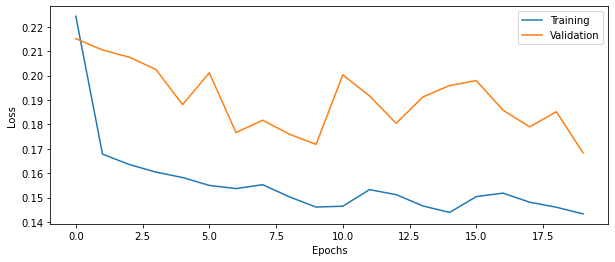

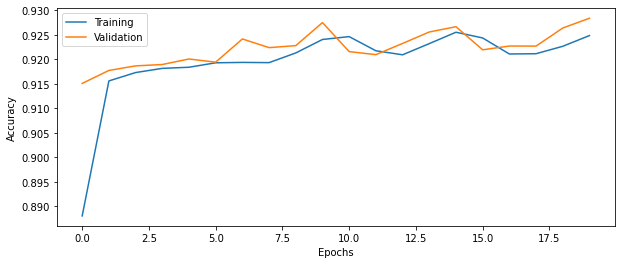

In [149]:
plot_results(history8)

# Part 18: Dropout regularization

Dropout is a type of regularization that can improve accuracy for validation and test data. 

Add a Dropout layer after each Dense layer (but not after the final dense layer) in `build_DNN`, with a dropout probability of 50%. Remember to first import the Dropout layer from keras.layers

See https://keras.io/api/layers/regularization_layers/dropout/ for how the Dropout layer works.

---

Question 18: How does the validation accuracy change when adding dropout?
#### Answer 18: When we use dropout, the validation accuracy is lower than the situation in which we do not use dropout.

Question 19: How does the test accuracy change when adding dropout?
#### Answer19: When we use dropout, the test accuracy is lower than the situation in which we do not use dropout.

### 2 layers, 20 nodes, class weights, dropout, SGD optimizer, no batch normalization, sigmoid activations

In [150]:
# Setup some training parameters
batch_size = 10000
epochs = 20
input_shape = (X.shape[1],)

# Build and train model
model9 = build_DNN(input_shape=input_shape, n_layers=2, n_nodes=20, learning_rate=0.1, act_fun='sigmoid', optimizer='sgd')

history9 =model9.fit(Xtrain,Ytrain,epochs = epochs,validation_data = (Xval,Yval),batch_size=batch_size,class_weight = class_weights)

Epoch 1/20
54/54 [==============================] - 1s 16ms/step - loss: 0.6933 - accuracy: 0.7573 - val_loss: 0.6440 - val_accuracy: 0.8957
Epoch 2/20
54/54 [==============================] - 1s 13ms/step - loss: 0.6219 - accuracy: 0.8945 - val_loss: 0.5262 - val_accuracy: 0.8933
Epoch 3/20
54/54 [==============================] - 1s 13ms/step - loss: 0.4829 - accuracy: 0.8891 - val_loss: 0.3768 - val_accuracy: 0.8892
Epoch 4/20
54/54 [==============================] - 1s 12ms/step - loss: 0.3330 - accuracy: 0.8870 - val_loss: 0.3008 - val_accuracy: 0.8886
Epoch 5/20
54/54 [==============================] - 1s 12ms/step - loss: 0.2608 - accuracy: 0.8868 - val_loss: 0.2764 - val_accuracy: 0.8896
Epoch 6/20
54/54 [==============================] - 1s 13ms/step - loss: 0.2337 - accuracy: 0.8889 - val_loss: 0.2649 - val_accuracy: 0.8912
Epoch 7/20
54/54 [==============================] - 1s 12ms/step - loss: 0.2221 - accuracy: 0.8894 - val_loss: 0.2588 - val_accuracy: 0.8924
Epoch 8/20
54

In [151]:
# Evaluate model on test data
score = model9.evaluate(Xtest, Ytest)

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

3582/3582 [==============================] - 4s 1ms/step - loss: 0.2368 - accuracy: 0.8992
Test loss: 0.2368
Test accuracy: 0.8992


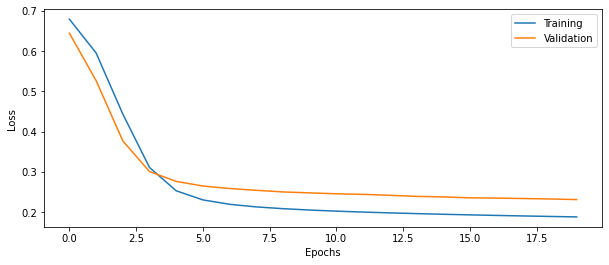

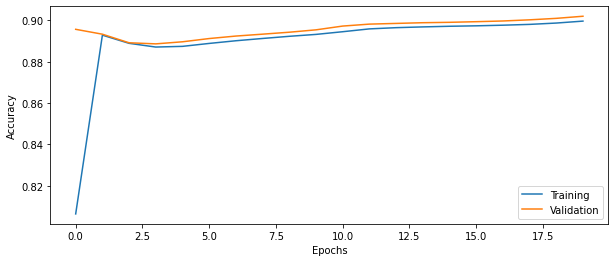

In [152]:
plot_results(history9)

# Part 19: Improving performance

Spend some time (30 - 90 minutes) playing with the network architecture (number of layers, number of nodes per layer, activation function) and other hyper parameters (optimizer, learning rate, batch size, number of epochs, degree of regularization). For example, try a much deeper network. How much does the training time increase for a network with 10 layers?

Question 20: How high classification accuracy can you achieve for the test data? What is your best configuration?

#### Answer 20:  
Here we select batch_size =1000, epochs=30, n_layers=5, n_nodes=50, learning_rate=0.01, optimizer='adam', act_fun=sigmoid, no batch normalization, no dropout, test accuracy=0.9359

In [95]:
batch_size = 1000
epochs = 30
input_shape = (X.shape[1],)

# Build and train model
model10 = build_DNN(input_shape=input_shape, n_layers=5, n_nodes=50, learning_rate=0.01,  optimizer='adam',act_fun='sigmoid')

history10 =model10.fit(Xtrain,Ytrain,epochs = epochs,validation_data = (Xval,Yval),batch_size=batch_size,class_weight = class_weights)

Epoch 1/30
535/535 [==============================] - 4s 7ms/step - loss: 0.2545 - accuracy: 0.8605 - val_loss: 0.2146 - val_accuracy: 0.9187
Epoch 2/30
535/535 [==============================] - 4s 7ms/step - loss: 0.1595 - accuracy: 0.9175 - val_loss: 0.1957 - val_accuracy: 0.9192
Epoch 3/30
535/535 [==============================] - 4s 7ms/step - loss: 0.1463 - accuracy: 0.9236 - val_loss: 0.1492 - val_accuracy: 0.9348
Epoch 4/30
535/535 [==============================] - 4s 7ms/step - loss: 0.1348 - accuracy: 0.9304 - val_loss: 0.1623 - val_accuracy: 0.9330
Epoch 5/30
535/535 [==============================] - 4s 7ms/step - loss: 0.1337 - accuracy: 0.9303 - val_loss: 0.1557 - val_accuracy: 0.9340
Epoch 6/30
535/535 [==============================] - 4s 7ms/step - loss: 0.1298 - accuracy: 0.9318 - val_loss: 0.1663 - val_accuracy: 0.9352
Epoch 7/30
535/535 [==============================] - 4s 7ms/step - loss: 0.1272 - accuracy: 0.9334 - val_loss: 0.1616 - val_accuracy: 0.9358
Epoch 

In [96]:
# Evaluate model on test data
score = model10.evaluate(Xtest, Ytest)

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

3582/3582 [==============================] - 4s 1ms/step - loss: 0.1561 - accuracy: 0.9359
Test loss: 0.1561
Test accuracy: 0.9359


# Part 20: Dropout uncertainty

Dropout can also be used during testing, to obtain an estimate of the model uncertainty. Since dropout will randomly remove connections, the network will produce different results every time the same (test) data is put into the network. This technique is called Monte Carlo dropout. For more information, see this paper http://proceedings.mlr.press/v48/gal16.pdf

To achieve this, we need to redefine the Keras Dropout call by running the cell below, and use 'myDropout' in each call to Dropout, in the cell that defines the DNN. The `build_DNN` function takes two boolean arguments, use_dropout and use_custom_dropout, add a standard Dropout layer if use_dropout is true, add a myDropout layer if use_custom_dropout is true.

Run the same test data through the trained network 100 times, with dropout turned on. 

Question 21: What is the mean and the standard deviation of the test accuracy?
#### Answer 21:
mean of 100 accuracies: 0.9176282674074173

STD of 100 accuracies : 0.00011789679779053108

In [98]:
import keras.backend as K
import keras

class myDropout(keras.layers.Dropout):
    """Applies Dropout to the input.
    Dropout consists in randomly setting
    a fraction `rate` of input units to 0 at each update during training time,
    which helps prevent overfitting.
    # Arguments
        rate: float between 0 and 1. Fraction of the input units to drop.
        noise_shape: 1D integer tensor representing the shape of the
            binary dropout mask that will be multiplied with the input.
            For instance, if your inputs have shape
            `(batch_size, timesteps, features)` and
            you want the dropout mask to be the same for all timesteps,
            you can use `noise_shape=(batch_size, 1, features)`.
        seed: A Python integer to use as random seed.
    # References
        - [Dropout: A Simple Way to Prevent Neural Networks from Overfitting](
           http://www.jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf)
    """
    def __init__(self, rate, training=True, noise_shape=None, seed=None, **kwargs):
        super(myDropout, self).__init__(rate, noise_shape=None, seed=None,**kwargs)
        self.training = training

        
    def call(self, inputs, training=None):
        if 0. < self.rate < 1.:
            noise_shape = self._get_noise_shape(inputs)

            def dropped_inputs():
                return K.dropout(inputs, self.rate, noise_shape,
                                 seed=self.seed)
            if not training: 
                return K.in_train_phase(dropped_inputs, inputs, training=self.training)
            return K.in_train_phase(dropped_inputs, inputs, training=training)
        return inputs

### Your best config, custom dropout

In [102]:
# Your best training parameters

batch_size = 1000
epochs = 30
input_shape = (X.shape[1],)


# Build and train model
model11 = build_DNN(input_shape=input_shape, n_layers=5, n_nodes=50, learning_rate=0.01,  optimizer='adam',act_fun='sigmoid',use_custom_dropout=True)

history11 =model11.fit(Xtrain,Ytrain,epochs = epochs,validation_data = (Xval,Yval),batch_size=batch_size,class_weight = class_weights)

Epoch 1/30
535/535 [==============================] - 7s 11ms/step - loss: 0.2867 - accuracy: 0.8499 - val_loss: 0.2206 - val_accuracy: 0.9117
Epoch 2/30
535/535 [==============================] - 6s 11ms/step - loss: 0.1763 - accuracy: 0.9127 - val_loss: 0.2161 - val_accuracy: 0.9168
Epoch 3/30
535/535 [==============================] - 6s 11ms/step - loss: 0.1715 - accuracy: 0.9145 - val_loss: 0.2193 - val_accuracy: 0.9166
Epoch 4/30
535/535 [==============================] - 6s 11ms/step - loss: 0.1715 - accuracy: 0.9144 - val_loss: 0.2131 - val_accuracy: 0.9166
Epoch 5/30
535/535 [==============================] - 6s 11ms/step - loss: 0.1712 - accuracy: 0.9143 - val_loss: 0.2180 - val_accuracy: 0.9167
Epoch 6/30
535/535 [==============================] - 6s 11ms/step - loss: 0.1719 - accuracy: 0.9146 - val_loss: 0.2160 - val_accuracy: 0.9172
Epoch 7/30
535/535 [==============================] - 6s 11ms/step - loss: 0.1709 - accuracy: 0.9149 - val_loss: 0.2150 - val_accuracy: 0.9171

In [111]:
# Run this cell a few times to evalute the model on test data, 
# if you get slightly different test accuracy every time, Dropout during testing is working

# Evaluate model on test data
score = model11.evaluate(Xtest, Ytest)
                       
print('Test accuracy: %.4f' % score[1])

3582/3582 [==============================] - 4s 1ms/step - loss: 0.2179 - accuracy: 0.9178
Test accuracy: 0.9178


In [114]:
# Run the testing 100 times, and save the accuracies in an array
accuracy=[]
for i in range(100):
    score = model11.evaluate(Xtest,Ytest,verbose = 0)
    accuracy.append(score[1])
    


In [115]:
# Calculate and print mean and std of accuracies

print("mean of 100 accuracies: {}".format (np.mean(accuracy)))
print("STD of 100 accuracies : {}".format (np.std(accuracy)))

mean of 100 accuracies: 0.9176282674074173
STD of 100 accuracies : 0.00011789679779053108


# Part 21: Cross validation uncertainty

Cross validation (CV) is often used to evaluate a model, by training and testing using different subsets of the data it is possible to get the uncertainty as the standard deviation over folds. We here use a help function from scikit-learn to setup the CV, see https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html . Use 10 folds with shuffling, random state 1234. 

Note: We here assume that you have found the best hyper parameters, so here the data are only split into training and testing, no validation.

---

Question 22: What is the mean and the standard deviation of the test accuracy?
#### Answer 22:
mean of 100 accuracies: 0.9190276026725769

STD of 100 accuracies : 0.0012772975368843832


Question 23: What is the main advantage of dropout compared to CV for estimating test uncertainty? The difference may not be so large in this notebook, but imagine that you have a network that takes 24 hours to train.

#### Answer 23:
In cross validation, at first we split the dataset in kfolds, train the model and evaluate by using the fold left. If have large data set it consumes time and complexity.In dropout method, we randomly delete some node and it is used just in traing , not evaluation.

In [120]:
from sklearn.model_selection import StratifiedKFold
batch_size = 1000
epochs = 30
input_shape = (X.shape[1],)
accuracy_cv=[]
# Define 10-fold cross validation
cv_fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)
# Loop over cross validation folds
for train, test in cv_fold.split(X, Y):
    Xtrain_fold, Xtest_fold = X[train], X[test]
    Ytrain_fold, Ytest_fold = Y[train], Y[test]
    
    # Calculate class weights for current split
    from sklearn.utils import class_weight
    class_weights = class_weight.compute_class_weight('balanced', np.unique(Ytrain_fold), Ytrain_fold)
    class_weights = {l:c for l,c in zip(np.unique(Ytrain_fold), class_weights)}
    
    # Rebuild the DNN model, to not continue training on the previously trained model
    model12=build_DNN(input_shape=input_shape, n_layers=5, n_nodes=50, learning_rate=0.01,  optimizer='adam',act_fun='sigmoid',use_custom_dropout=True)
    
    # Fit the model with training set and class weights for this fold
    history12 =model12.fit(Xtrain_fold,Ytrain_fold,epochs = epochs,batch_size=batch_size,class_weight = class_weights, verbose=0)
    
    # Evaluate the model using the test set for this fold
    score = model12.evaluate(Xtest_fold, Ytest_fold)
    
    # Save the test accuracy in an array
    accuracy_cv.append(score[1])



2388/2388 [==============================] - 3s 1ms/step - loss: 0.2139 - accuracy: 0.9177


In [121]:
# Calculate and print mean and std of accuracies
print("mean of 100 accuracies: {}".format (np.mean(accuracy_cv)))
print("STD of 100 accuracies : {}".format (np.std(accuracy_cv)))

mean of 100 accuracies: 0.9190276026725769
STD of 100 accuracies : 0.0012772975368843832


# Part 22: DNN regression

A similar DNN can be used for regression, instead of classification.

Question 24: How would you change the DNN in order to use it for regression instead?

#### Answer 24:
We should not use activation function in final output later.(or we can use activation='linear'.
The default loss in regression is Mean Square Error, MSE.
We should use kerasRegressor to create model with specific parameters as build_fn, epochs and batch size.